In [23]:
import os
import subprocess

# === SETTINGS ===
INPUT_DIR = "raw_opus_files"     # Folder where your original .opus files are
OUTPUT_DIR = "team_audios"       # Where the .wav files will go

# Create output folder if not exists
os.makedirs(OUTPUT_DIR, exist_ok=True)

# === Convert and Rename ===
counter = 1

for file in os.listdir(INPUT_DIR):
    if file.endswith(".opus"):
        input_path = os.path.join(INPUT_DIR, file)
        output_name = f"audio_{counter}.wav"
        output_path = os.path.join(OUTPUT_DIR, output_name)

        # ffmpeg conversion
        command = ["ffmpeg", "-y", "-i", input_path, output_path]
        subprocess.run(command, stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)

        print(f"✅ Converted: {file} → {output_name}")
        counter += 1


✅ Converted: WhatsApp Audio 2025-07-25 at 15.26.20.opus → audio_1.wav
✅ Converted: WhatsApp Audio 2025-07-25 at 15.30.09.opus → audio_2.wav
✅ Converted: WhatsApp Audio 2025-07-26 at 22.42.31.opus → audio_3.wav
✅ Converted: WhatsApp Audio 2025-07-25 at 17.15.45.opus → audio_4.wav
✅ Converted: WhatsApp Audio 2025-07-25 at 17.15.38.opus → audio_5.wav
✅ Converted: WhatsApp Audio 2025-07-26 at 20.54.01.opus → audio_6.wav
✅ Converted: WhatsApp Audio 2025-07-26 at 22.42.44.opus → audio_7.wav
✅ Converted: WhatsApp Audio 2025-07-26 at 20.54.07.opus → audio_8.wav


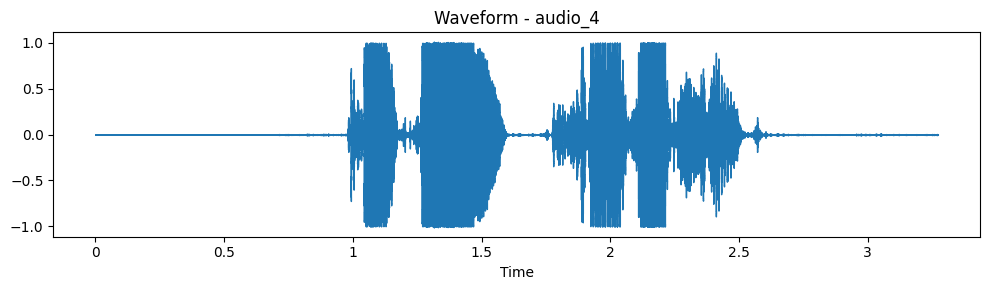

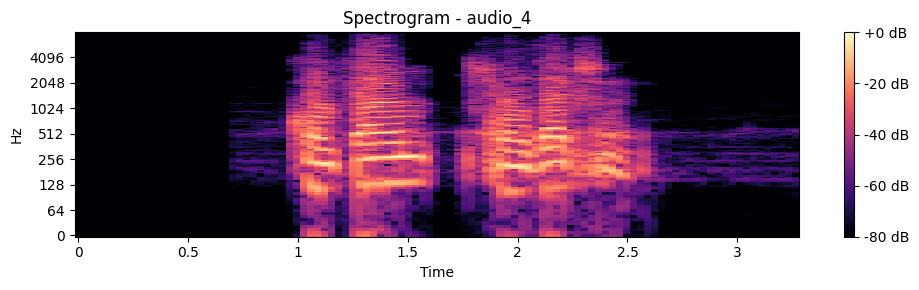

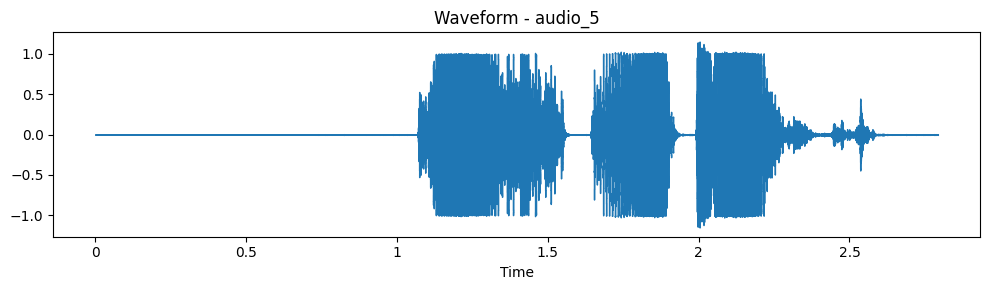

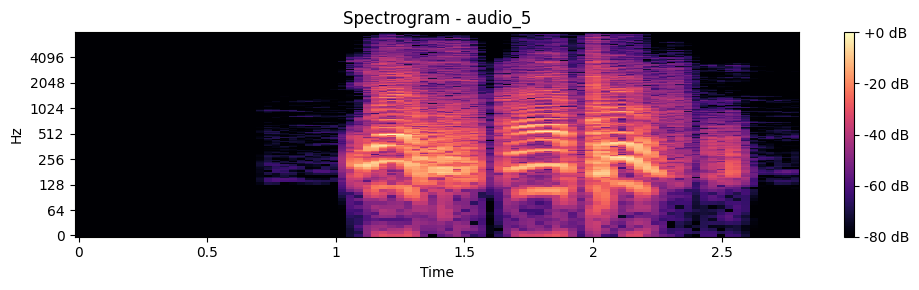

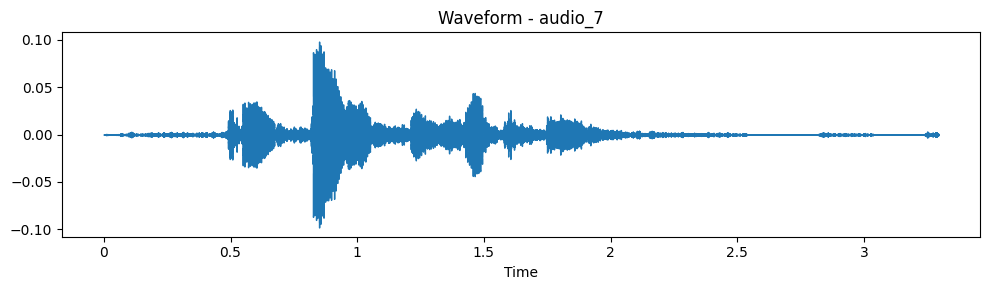

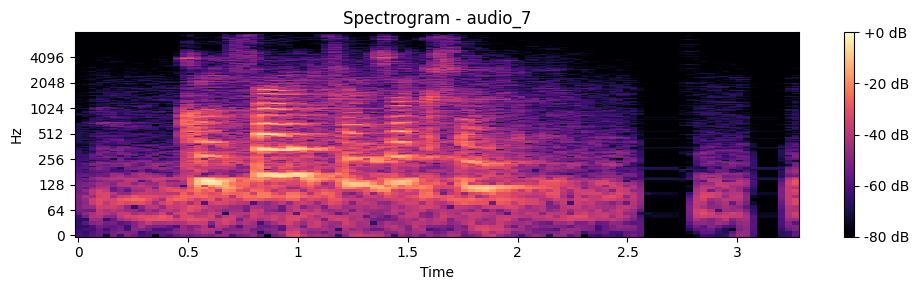

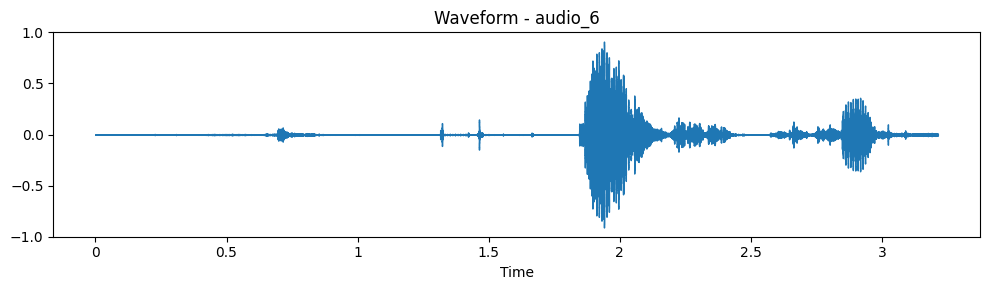

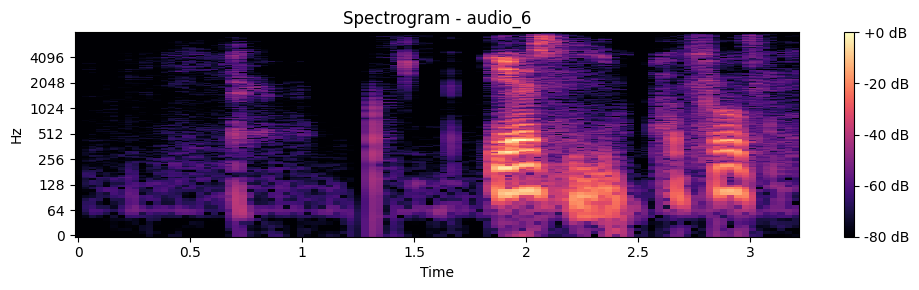

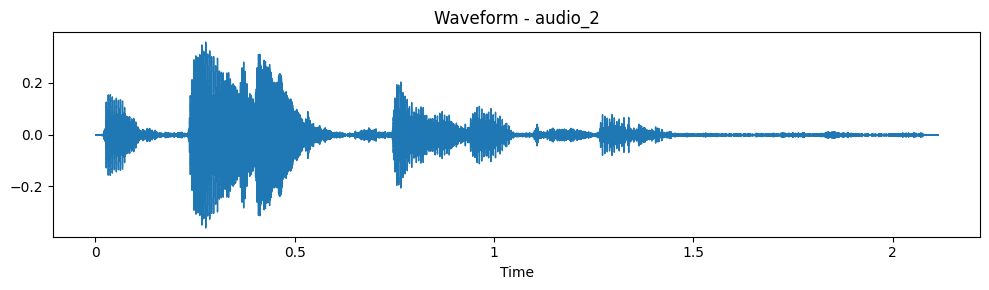

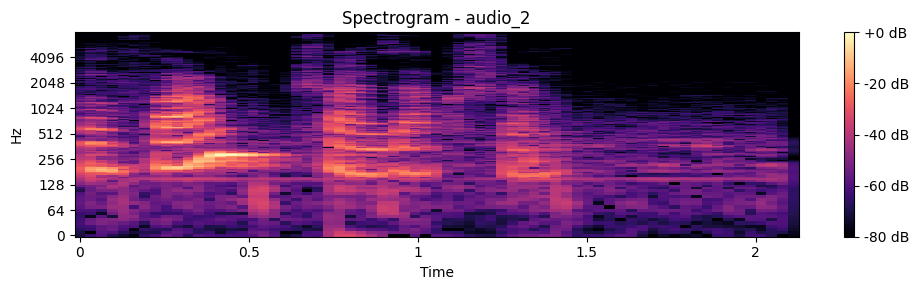

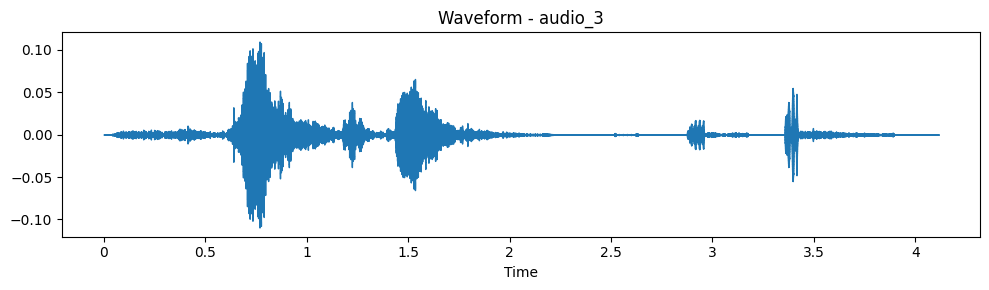

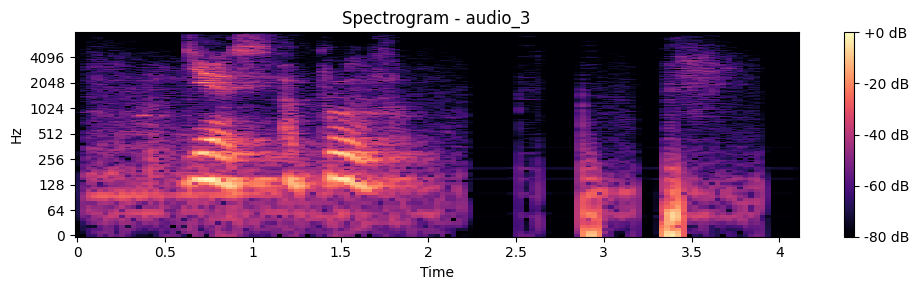

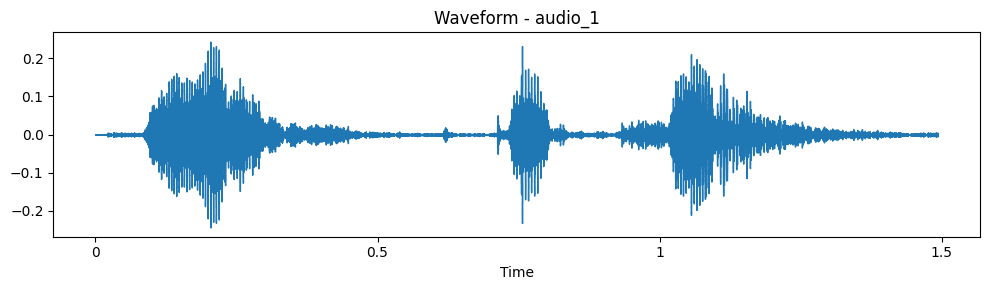

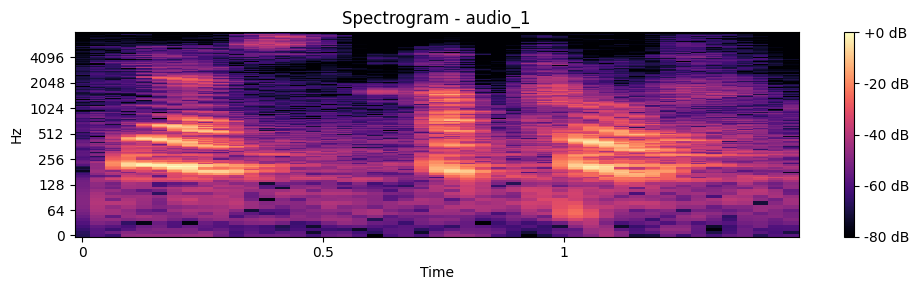

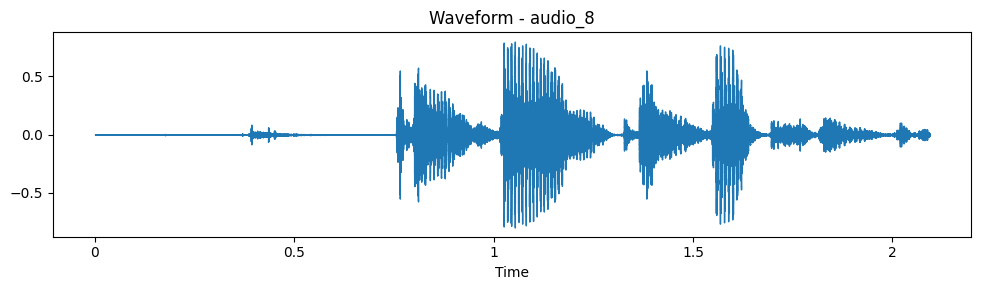

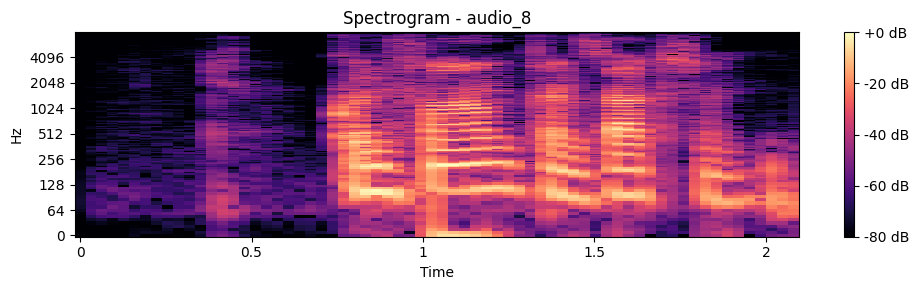

✅ Features saved to team_audio_features.csv


In [24]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf
import pandas as pd

# === CONFIGURATION ===
AUDIO_DIR = "./team_audios"
AUG_DIR = "./augmented_audios"
os.makedirs(AUG_DIR, exist_ok=True)

# === Function 1: Visualize Waveform & Spectrogram ===
def visualize_audio(file_path, title):
    y, sr = librosa.load(file_path, sr=16000)

    # Waveform
    plt.figure(figsize=(10, 3))
    librosa.display.waveshow(y, sr=sr)
    plt.title(f"Waveform - {title}")
    plt.tight_layout()
    plt.show()

    # Spectrogram
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    plt.figure(figsize=(10, 3))
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.title(f"Spectrogram - {title}")
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()
    plt.show()

    return y, sr

# === Function 2: Apply Audio Augmentations ===
def apply_augmentations(y, sr, base_name):
    aug_files = []

    # Time Stretch
    y_stretch = librosa.effects.time_stretch(y, rate=1.25)
    f1 = os.path.join(AUG_DIR, f"{base_name}_stretch.wav")
    sf.write(f1, y_stretch, sr)
    aug_files.append(f1)

    # Pitch Shift
    y_pitch = librosa.effects.pitch_shift(y, sr=sr, n_steps=4)
    f2 = os.path.join(AUG_DIR, f"{base_name}_pitch.wav")
    sf.write(f2, y_pitch, sr)
    aug_files.append(f2)

    # Background Noise
    noise = 0.003 * np.random.randn(len(y))
    y_noise = y + noise
    f3 = os.path.join(AUG_DIR, f"{base_name}_noise.wav")
    sf.write(f3, y_noise, sr)
    aug_files.append(f3)

    return aug_files

# === Function 3: Feature Extraction ===
def extract_features(file):
    if not os.path.exists(file):
        print(f"⚠️ Skipping missing file: {file}")
        return None

    y, sr = librosa.load(file, sr=16000)

    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfccs_mean = np.mean(mfccs)

    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    rolloff_mean = np.mean(rolloff)

    energy = np.sum(y ** 2) / len(y)

    return {
        "filename": file,
        "mfcc_mean": mfccs_mean,
        "rolloff_mean": rolloff_mean,
        "energy": energy
    }

# === MAIN PIPELINE ===

# Step 1: Visualize and augment
original_files = [os.path.join(AUDIO_DIR, f) for f in os.listdir(AUDIO_DIR) if f.endswith(".wav")]
augmented_files = []

for f in original_files:
    title = os.path.splitext(os.path.basename(f))[0]
    y, sr = visualize_audio(f, title)
    base_name = os.path.splitext(os.path.basename(f))[0]
    augmented = apply_augmentations(y, sr, base_name)
    augmented_files.extend(augmented)

# Step 2: Extract features from all files
all_files = original_files + augmented_files
features = []

for f in all_files:
    feats = extract_features(f)
    if feats:
        features.append(feats)

# Step 3: Save to CSV
df = pd.DataFrame(features)
df.to_csv("team_audio_features.csv", index=False)
print("✅ Features saved to team_audio_features.csv")


✅ Converted: WhatsApp Audio 2025-07-25 at 15.26.20.opus → audio_1.wav
✅ Converted: WhatsApp Audio 2025-07-25 at 15.30.09.opus → audio_2.wav
✅ Converted: WhatsApp Audio 2025-07-26 at 22.42.31.opus → audio_3.wav
✅ Converted: WhatsApp Audio 2025-07-25 at 17.15.45.opus → audio_4.wav
✅ Converted: WhatsApp Audio 2025-07-25 at 17.15.38.opus → audio_5.wav
✅ Converted: WhatsApp Audio 2025-07-26 at 20.54.01.opus → audio_6.wav
✅ Converted: WhatsApp Audio 2025-07-26 at 22.42.44.opus → audio_7.wav
✅ Converted: WhatsApp Audio 2025-07-26 at 20.54.07.opus → audio_8.wav
